In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import re
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
txt_files = {}
for file in os.listdir('./'):
    if file.endswith('.txt'):
        with open(file, 'r') as f:
            txt_files[file] = f.read()

In [3]:
table = {'Algorithm': [], 'Dimensionality': [], 'Modes_explored': [], 'Time': []}

In [4]:
for name in txt_files.keys():
    re_out = re.findall(r'dim (\d{1,3}), n_modes = (\d)[\D]{9}([\d.]*)', txt_files[name])
    for r in re_out:
        table['Algorithm'].append(name[8:-4])
        table['Dimensionality'].append(int(r[0]))
        table['Modes_explored'].append(int(r[1]))
        t = None if r[2]=='' else float(r[2])
        table['Time'].append(t)

In [5]:
df = pd.DataFrame(table)
df.sample(10)

,Algorithm,Dimensionality,Modes_explored,Time
178,metflow_train,5,3,841.189295
219,8_hoffman,10,1,653.996716
109,metflow_fix,7,3,761.924879
189,8_hoffman,5,1,NaN
148,metflow_train,100,2,NaN
192,8_hoffman,3,5,NaN
185,8_hoffman,5,1,NaN
114,metflow_train,3,8,NaN
50,metflow_fix,100,2,NaN
217,8_hoffman,5,3,512.660140


In [6]:
grouped = df.groupby(['Algorithm', 'Dimensionality'])[['Modes_explored']]

In [7]:
groups = dict(list(grouped))
groups.keys()

dict_keys([('8_hoffman', 3), ('8_hoffman', 5), ('8_hoffman', 7), ('8_hoffman', 10), ('8_standard_normal', 3), ('8_standard_normal', 5), ('8_standard_normal', 7), ('8_standard_normal', 10), ('8_standard_normal', 20), ('8_standard_normal', 50), ('8_standard_normal', 100), ('8_wide_normal', 3), ('8_wide_normal', 5), ('8_wide_normal', 7), ('8_wide_normal', 10), ('8_wide_normal', 20), ('8_wide_normal', 50), ('8_wide_normal', 100), ('metflow_fix', 3), ('metflow_fix', 5), ('metflow_fix', 7), ('metflow_fix', 10), ('metflow_fix', 20), ('metflow_fix', 50), ('metflow_fix', 100), ('metflow_train', 3), ('metflow_train', 5), ('metflow_train', 7), ('metflow_train', 10), ('metflow_train', 20), ('metflow_train', 50), ('metflow_train', 100)])

In [8]:
table_to_plot = {'Algorithm': [], 'Dimensionality': [], 'Mean_modes': [], 'Std_modes': [], 'Mean_time': [], 'Std_time': []}

In [9]:
for gr in groups.keys():
    table_to_plot['Algorithm'].append(gr[0])
    table_to_plot['Dimensionality'].append(gr[1])
    table_to_plot['Mean_modes'].append(groups[gr].Modes_explored.mean())
    table_to_plot['Std_modes'].append(groups[gr].Modes_explored.std())
    table_to_plot['Mean_time'].append(groups[gr].Time.mean())
    table_to_plot['Std_time'].append(groups[gr].Time.std())
table_to_plot = pd.DataFrame(table_to_plot)

In [10]:
table_to_plot.fillna(0., inplace=True)
table_to_plot

,Algorithm,Dimensionality,Mean_modes,Std_modes,Mean_time,Std_time
0,8_hoffman,3,4.8,1.549193,424.569292,44.350857
1,8_hoffman,5,1.9,1.100505,527.787532,52.177066
2,8_hoffman,7,1.3,0.674949,576.584572,24.720159
3,8_hoffman,10,1.0,0.000000,686.189185,47.299269
4,8_standard_normal,3,4.0,0.942809,357.712189,9.130307
5,8_standard_normal,5,2.1,1.100505,466.002196,6.546790
6,8_standard_normal,7,1.2,0.421637,511.618642,10.613991
7,8_standard_normal,10,1.0,0.000000,591.346226,15.236553
8,8_standard_normal,20,1.0,0.000000,970.935582,88.518858
9,8_standard_normal,50,1.0,0.000000,1888.041883,97.291603


In [11]:
for gr in groups.keys():
    print(gr)

('8_hoffman', 3)
('8_hoffman', 5)
('8_hoffman', 7)
('8_hoffman', 10)
('8_standard_normal', 3)
('8_standard_normal', 5)
('8_standard_normal', 7)
('8_standard_normal', 10)
('8_standard_normal', 20)
('8_standard_normal', 50)
('8_standard_normal', 100)
('8_wide_normal', 3)
('8_wide_normal', 5)
('8_wide_normal', 7)
('8_wide_normal', 10)
('8_wide_normal', 20)
('8_wide_normal', 50)
('8_wide_normal', 100)
('metflow_fix', 3)
('metflow_fix', 5)
('metflow_fix', 7)
('metflow_fix', 10)
('metflow_fix', 20)
('metflow_fix', 50)
('metflow_fix', 100)
('metflow_train', 3)
('metflow_train', 5)
('metflow_train', 7)
('metflow_train', 10)
('metflow_train', 20)
('metflow_train', 50)
('metflow_train', 100)


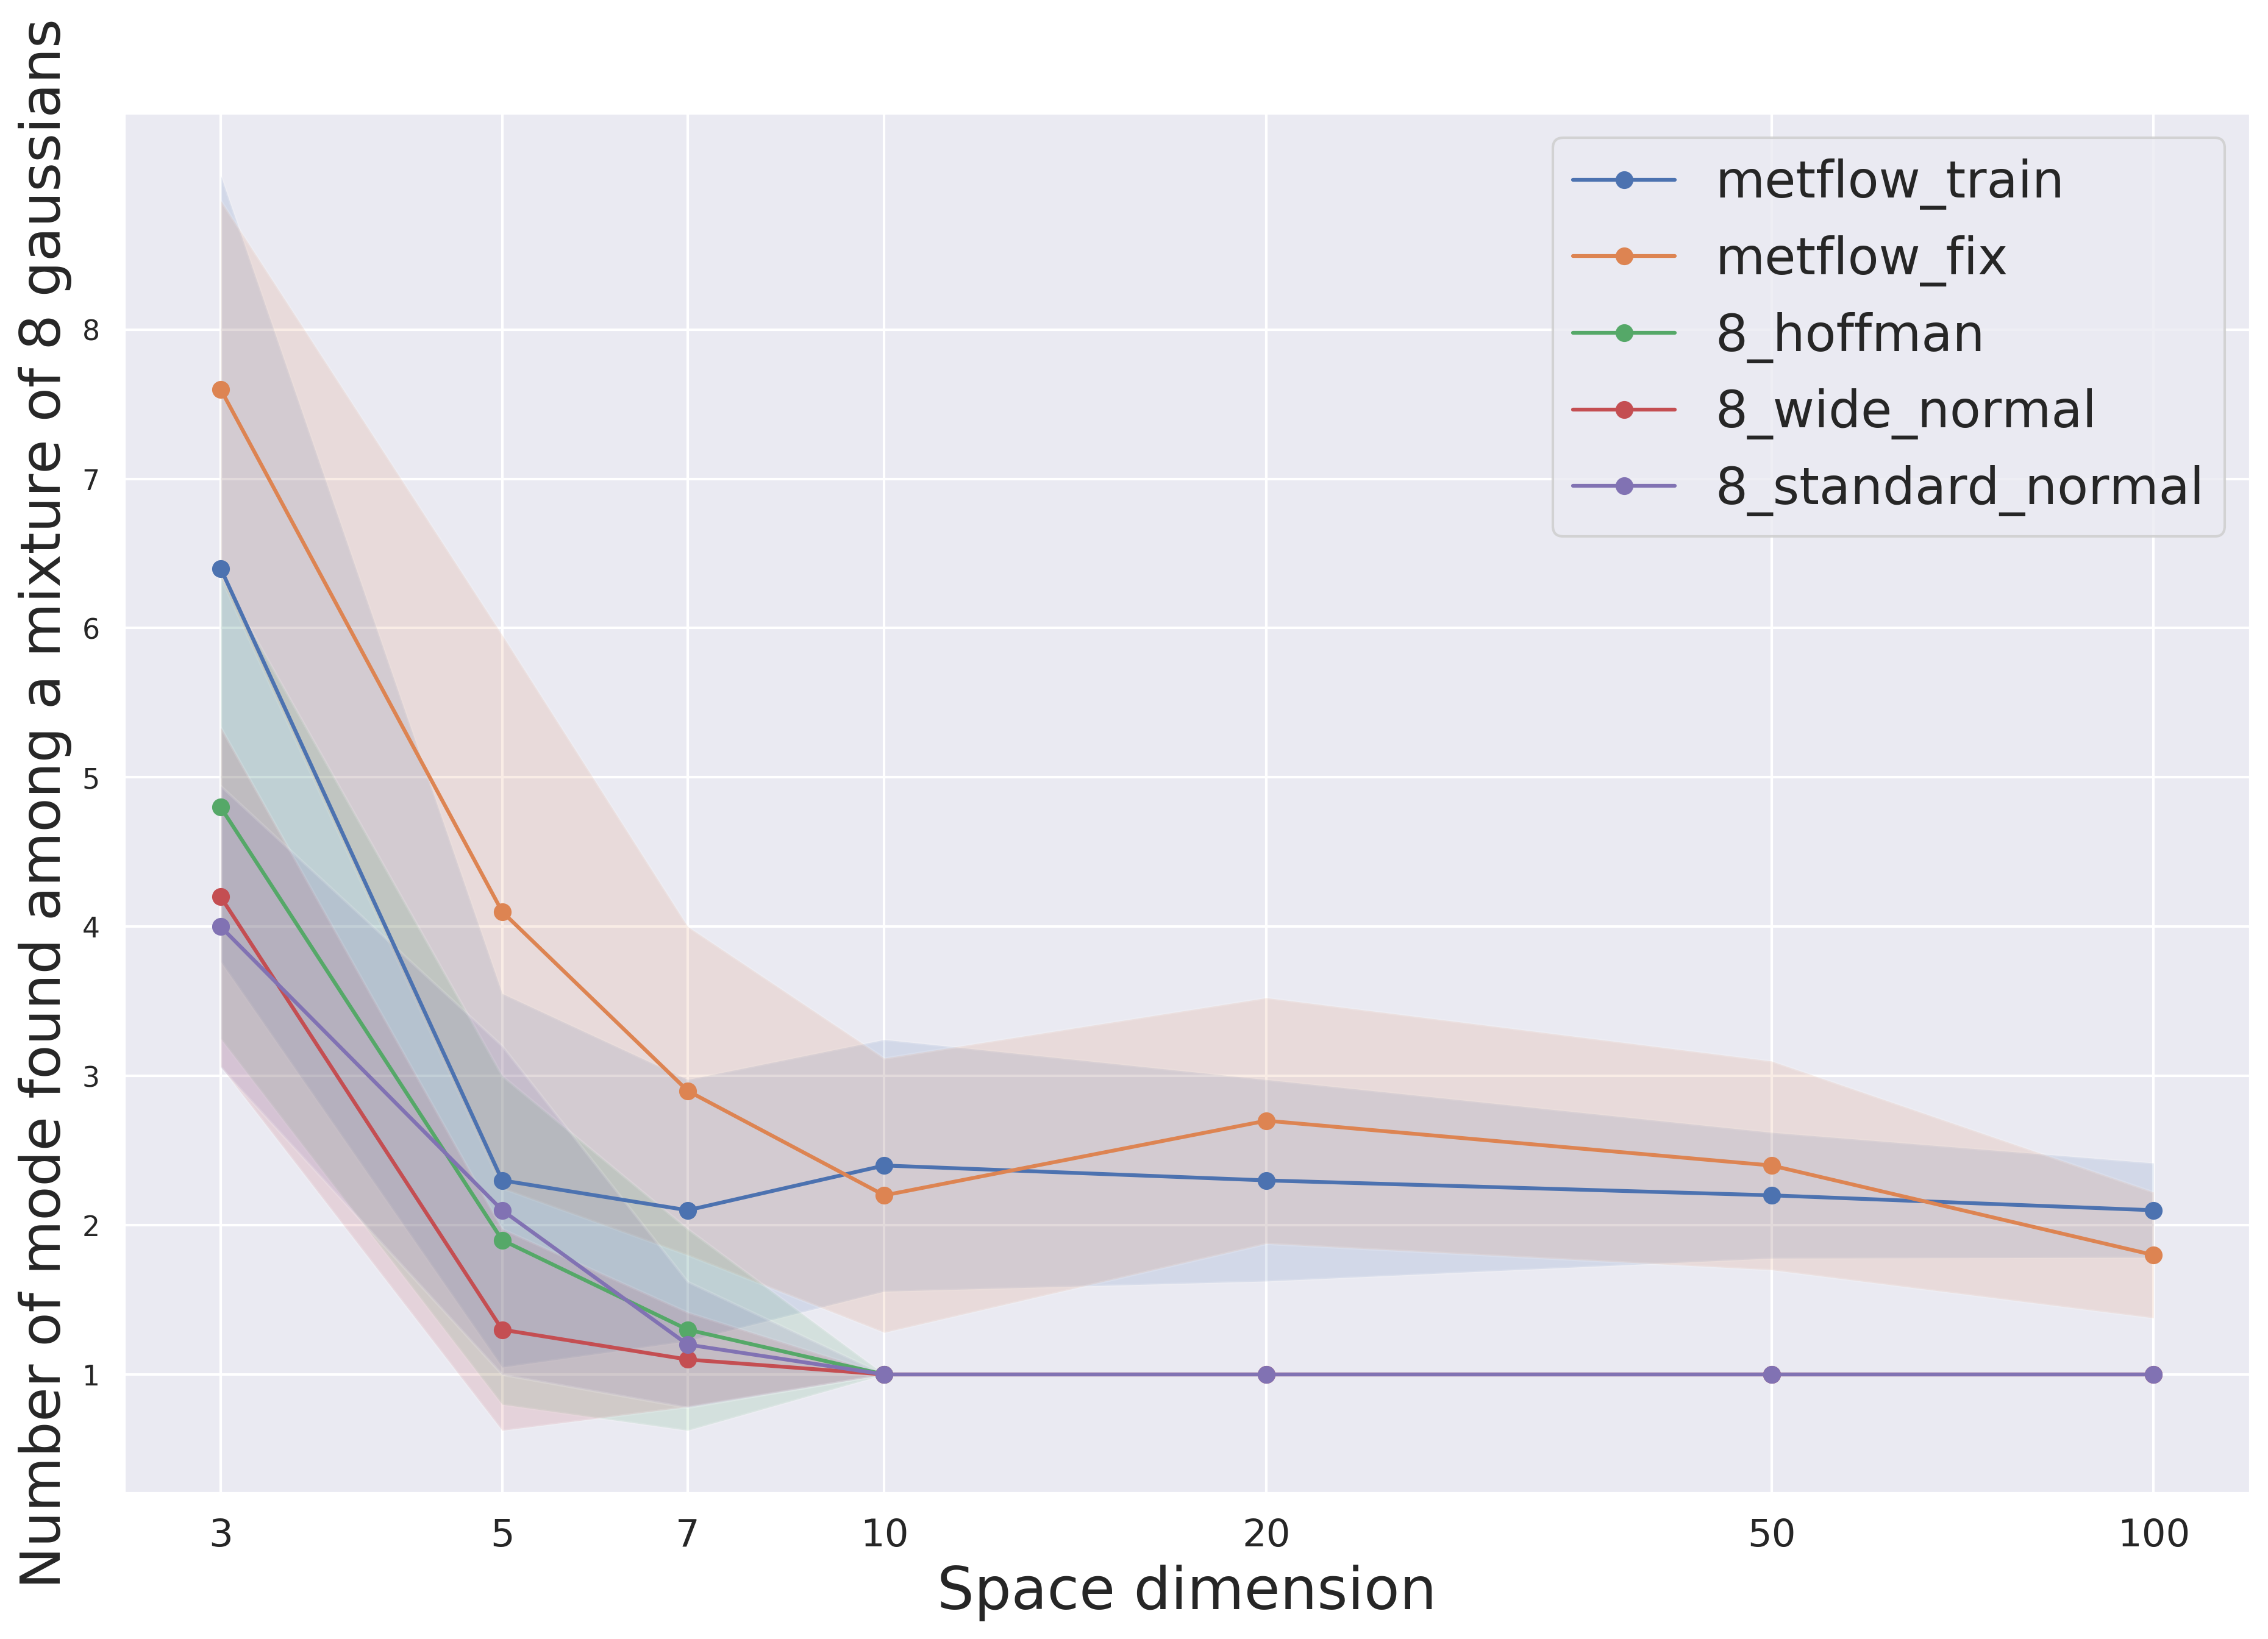

In [12]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    len_current = table_to_plot[table_to_plot.Algorithm == alg].Mean_modes.shape[0]
    plt.plot(x[:len_current], table_to_plot[table_to_plot.Algorithm == alg].Mean_modes,
             label=alg, marker='o')
    plt.fill_between(x[:len_current],
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes - table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes + table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     alpha=.15)
plt.xticks(x, dims, fontsize=15)
plt.yticks(1 + np.arange(8))
plt.xlabel("Space dimension", fontsize=23)
plt.ylabel("Number of mode found among a mixture of 8 gaussians", fontsize=22)
plt.legend(prop={'size': 20});

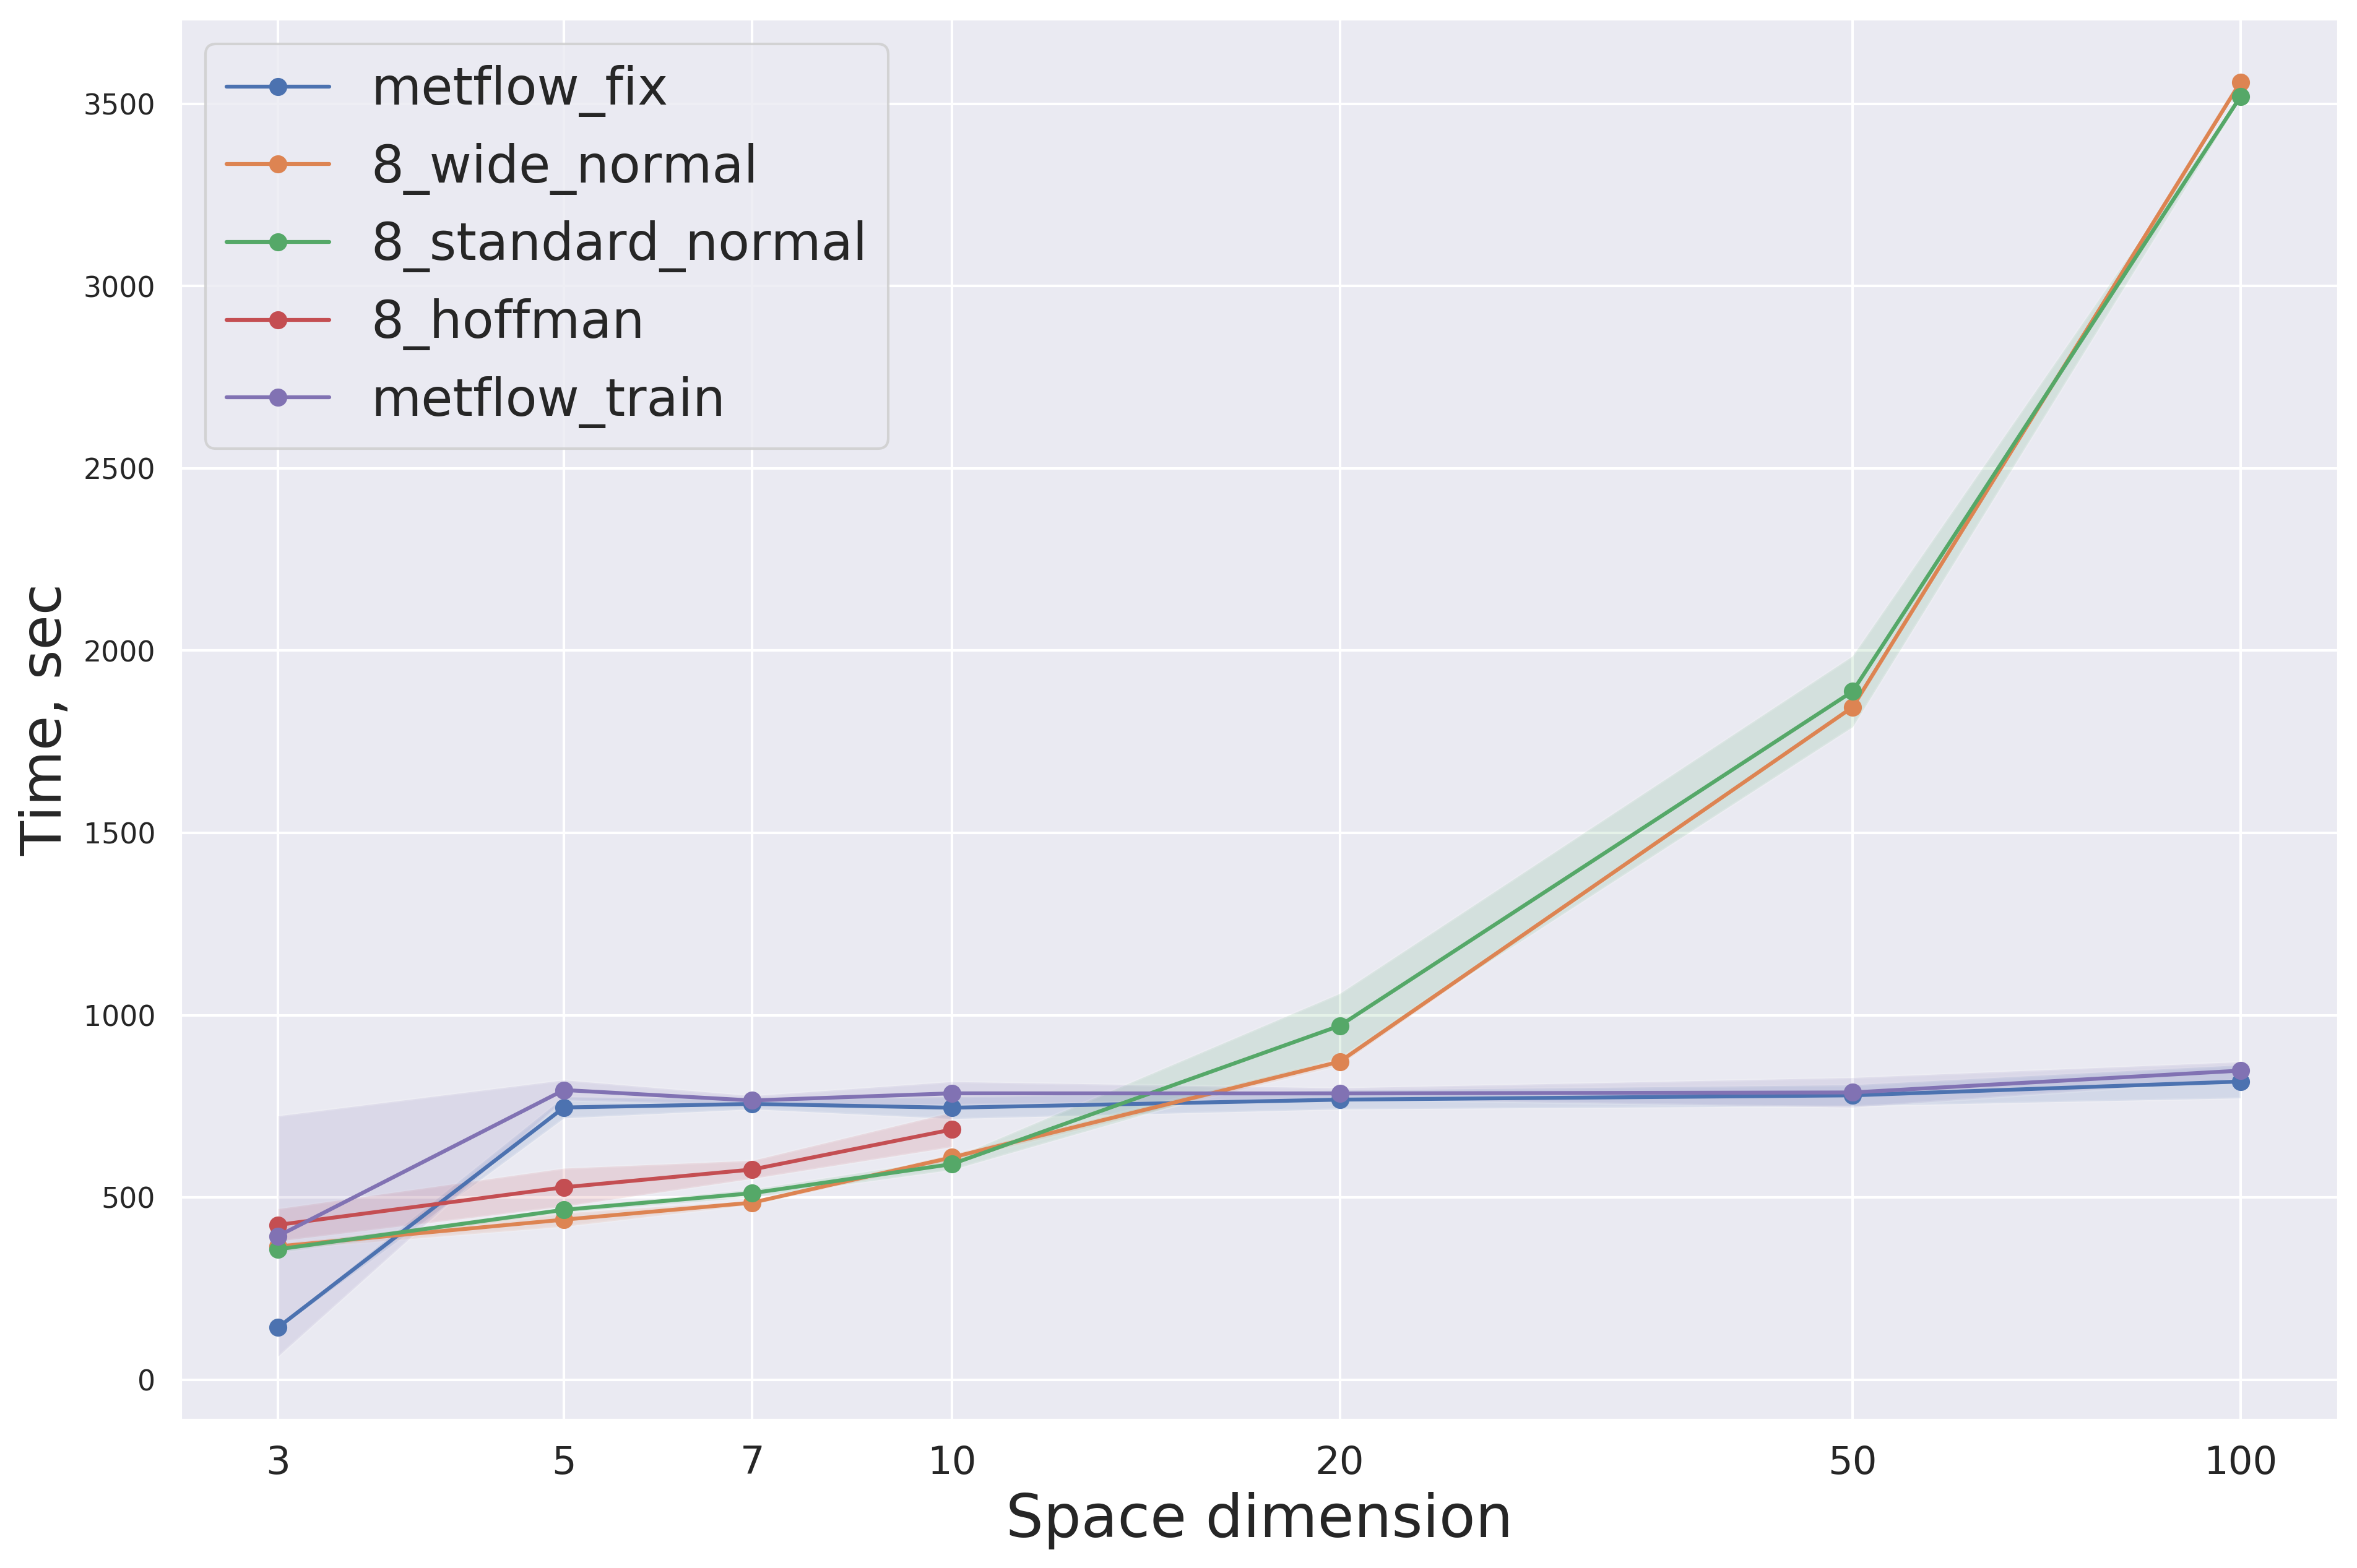

In [14]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    len_current = table_to_plot[table_to_plot.Algorithm == alg].Mean_time.shape[0]
    plt.plot(x[:len_current], table_to_plot[table_to_plot.Algorithm == alg].Mean_time,
             label=alg, marker='o')
    plt.fill_between(x[:len_current],
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_time - table_to_plot[table_to_plot.Algorithm == alg].Std_time,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_time + table_to_plot[table_to_plot.Algorithm == alg].Std_time,
                     alpha=.15)
plt.xticks(x, dims, fontsize=15)
plt.xlabel("Space dimension", fontsize=23)
plt.ylabel("Time, sec", fontsize=22)
plt.legend(prop={'size': 20});